## Module 5. Community Detection

In [1]:
# Community API
# Louvain algorithm not implemented in NetworkX -> pip install python-louvain package
!pip install python-louvain

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
from networkx.algorithms import community
import community as cm

%matplotlib inline

### Load data

**Zachary's Karate Club**
* **nodes**: 34 members of a karate club
* **edges**: 78 links between members who interacted outside the club
* graph example embedded in NetworkX: `nx.karate_club_graph()`

In [3]:
# load data 
G = nx.karate_club_graph()

### Louvain modularity maximization

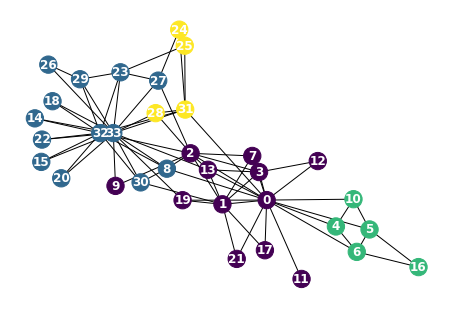

In [4]:
# detect communities
partitions = cm.best_partition(G)

# draw network & color communities
nx.draw(G, with_labels=True, font_weight='bold',font_color='white', 
        node_color=list(partitions.values()))

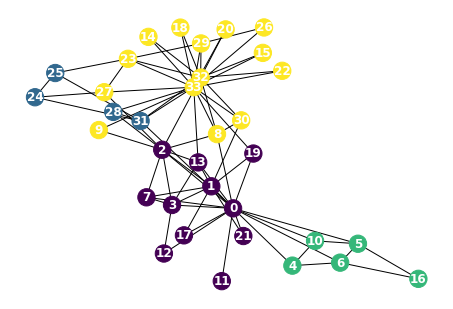

In [5]:
# detect communities - stochastic process: fix random seed
partitions = cm.best_partition(G, random_state=42)

# draw network & color communities
nx.draw(G, with_labels=True, font_weight='bold',font_color='white', 
        node_color=list(partitions.values()))

In [6]:
# a dictionary of which node belongs to which community
partitions

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 2,
 5: 2,
 6: 2,
 7: 0,
 8: 3,
 9: 3,
 10: 2,
 11: 0,
 12: 0,
 13: 0,
 14: 3,
 15: 3,
 16: 2,
 17: 0,
 18: 3,
 19: 0,
 20: 3,
 21: 0,
 22: 3,
 23: 3,
 24: 1,
 25: 1,
 26: 3,
 27: 3,
 28: 1,
 29: 3,
 30: 3,
 31: 1,
 32: 3,
 33: 3}

In [7]:
# get modularity score for partition
cm.modularity(partitions, G)

0.4151051939513478

In [8]:
# checks if a list or iterable of sets of nodes is a partition in G
community.is_partition(G, ['1','2','3'])

False

### Zachary karate club baseline community structure

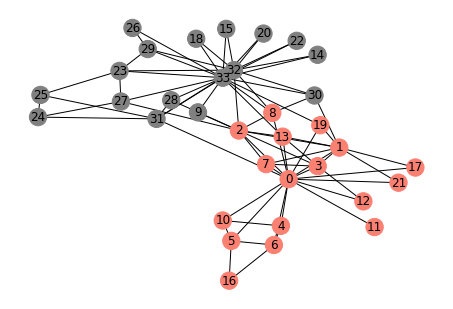

In [10]:
K = nx.karate_club_graph()
club_color = {
    'Mr. Hi': 'salmon',
    'Officer': 'gray',
}
node_colors = [club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K, node_color=node_colors, with_labels=True)

In [11]:
# club membership attribute
K.nodes[0]

{'club': 'Mr. Hi'}

### Bridge removal (Girvan-Newman)

In [12]:
#generates a sequence containing one partition of each size greater than one
list(community.girvan_newman(K))

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9},
  {11}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33},
  {9},
  {11},
  {26}),
 ({0, 1, 3, 7, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33},
  {

In [13]:
part = community.girvan_newman(K)

### Greedy modularity maximization

In [14]:
# list of sets of nodes, one for each community, sorted by largest communities first
part = community.greedy_modularity_communities(K)

In [15]:
community.modularity(K, part)

0.3806706114398422

### Label propagation

In [16]:
part = nx.community.asyn_lpa_communities(G)
community.modularity(G, part)

0.37146614069691

In [17]:
part = community.label_propagation_communities(G)
community.modularity(G, part)

0.3251150558842867

### Stochastic block model

In [ ]:
# P - stochastic block matrix
# S - community sizes as list
# SBM = nx.generators.stochastic_block_model(S, P)